#  Task 1

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler



In [2]:
train_label = []
train_samples = []

In [3]:

# false 
for i in range(50):
    r = randint(13,64)
    train_label.append(1)
    train_samples.append(r)
    
    ro =  randint(65,100)
    train_samples.append(ro)
    train_label.append(0)
   


for i in range(1000):
    r = randint(13,64)
    train_label.append(0)
    train_samples.append(r)
    
    ro =  randint(65,100)
    train_samples.append(ro)
    train_label.append(1)
    


In [4]:
train_label = np.array(train_label)
train_samples = np.array(train_samples)

train_label,train_samples = shuffle(train_label,train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_trained_sample = scaler.fit_transform(train_samples.reshape(-1,1))


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
model = Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### if using  validation slipt make sure you train and test get shuffle before even using suffle in fit will not help it may suffle only train and test may be involved if we have 2 classes if test as only one class than it lead to worst fit

In [9]:
model.fit(scaler_trained_sample,train_label,batch_size=4,epochs=25,validation_split=0.2)

Epoch 1/25
420/420 [==============================] - 2s 2ms/step - loss: 0.6654 - accuracy: 0.5952 - val_loss: 0.6407 - val_accuracy: 0.7357
Epoch 2/25
420/420 [==============================] - 1s 2ms/step - loss: 0.6179 - accuracy: 0.7631 - val_loss: 0.5887 - val_accuracy: 0.8000
Epoch 3/25
420/420 [==============================] - 1s 2ms/step - loss: 0.5674 - accuracy: 0.8262 - val_loss: 0.5377 - val_accuracy: 0.8357
Epoch 4/25
420/420 [==============================] - 1s 2ms/step - loss: 0.5187 - accuracy: 0.8512 - val_loss: 0.4889 - val_accuracy: 0.8714
Epoch 5/25
420/420 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.8768 - val_loss: 0.4430 - val_accuracy: 0.8786
Epoch 6/25
420/420 [==============================] - 1s 2ms/step - loss: 0.4311 - accuracy: 0.8845 - val_loss: 0.4026 - val_accuracy: 0.9000
Epoch 7/25
420/420 [==============================] - 1s 1ms/step - loss: 0.3953 - accuracy: 0.8929 - val_loss: 0.3690 - val_accuracy: 0.9071
Epoch 

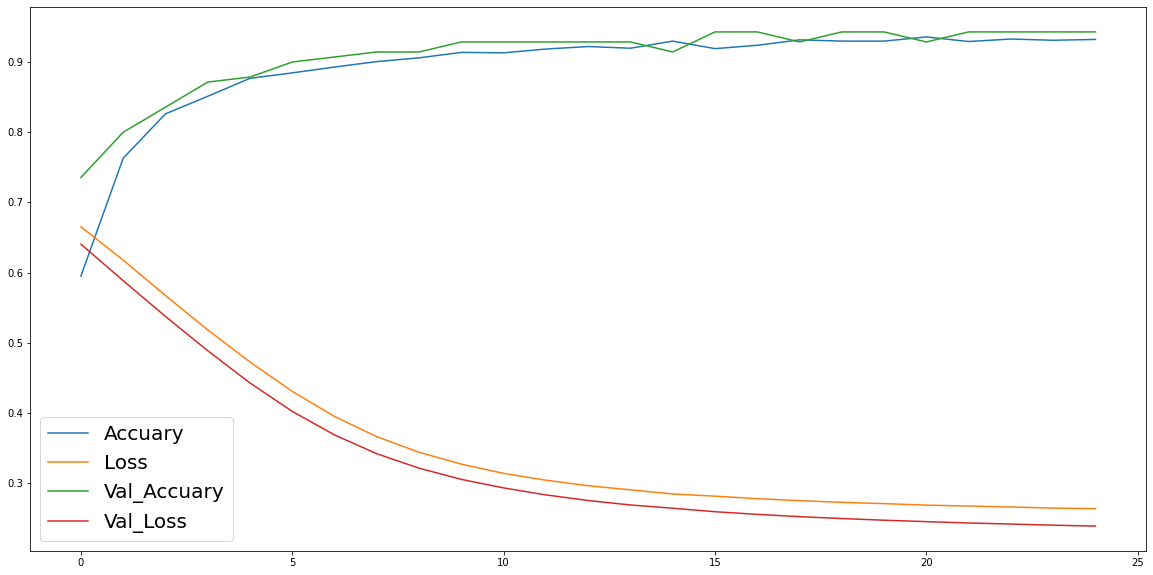

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
plt.plot(model.history.epoch,model.history.history['accuracy'],label='Accuary')
plt.plot(model.history.epoch,model.history.history['loss'],label='Loss')
plt.plot(model.history.epoch,model.history.history['val_accuracy'],label='Val_Accuary')
plt.plot(model.history.epoch,model.history.history['val_loss'],label='Val_Loss')
plt.legend(prop={"size":20})
plt.show()

In [11]:
import os
if os.path.isfile('./model/model_task1.h5')==False:
    model.save("./model/model_task1.h5")

In [12]:
from tensorflow.keras.models import load_model
new_model = load_model('./model/model_task1.h5')

In [13]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
new_model.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_9_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_9',
    'trainable': True,
    'batch_input_shape': (None, 1),
    'dtype': 'float32',
    'units': 16,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_10',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_i

In [15]:
for i,j in enumerate(new_model.layers):
    print(j.get_weights()[0].shape) #weigths
    print(j.get_weights()[1].shape) # bais
    print('#####')
    print('\n')

(1, 16)
(16,)
#####


(16, 32)
(32,)
#####


(32, 2)
(2,)
#####




# Saving
* h5 saves replicate of model, we have same weights, optimizer,loss and can run on go
* json can hv only architecture , we need to retrain, dont have optimaizer ,loss everything and need to retrain
* model.save_weights() save  weights load architecture and new_arch_model.load_weights()

# Task 2

In [17]:
import os
os.chdir('./datasets/dog_vs_cat/')



In [21]:
dir_list = ['train/dog','test/dog','valid/dog','train/cat','test/cat','valid/cat']
for i in dir_list:
    if os.path.exists(i)==False:
        print(i)
        os.makedirs(i)

In [25]:
import random
import shutil
import glob
for c in random.sample(glob.glob('cat*'),500):
    shutil.move(c,'train/cat')
    
for c in random.sample(glob.glob('dog*'),500):
    shutil.move(c,'train/dog')
    
    
for c in random.sample(glob.glob('dog*'),100):
    shutil.move(c,'valid/dog')
    
for c in random.sample(glob.glob('cat*'),100):
    shutil.move(c,'valid/cat')
    
for c in random.sample(glob.glob('dog*'),50):
    shutil.move(c,'test/dog')
    
for c in random.sample(glob.glob('cat*'),50):
    shutil.move(c,'test/cat')

In [26]:
os.chdir('../')

In [28]:
train_path = './dog_vs_cat/train/'
valid_path = './dog_vs_cat/valid/'
test_path = './dog_vs_cat/test/'

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

vaild_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [35]:
img,label =next(train_batches)
img.shape  # 10 images as batch  size =10

(10, 224, 224, 3)

In [43]:
def plot_image(img,label):
    fig,axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for i,j,k in zip(img,axes,label):
        j.imshow(i)
        j.set_title(k)
        j.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input

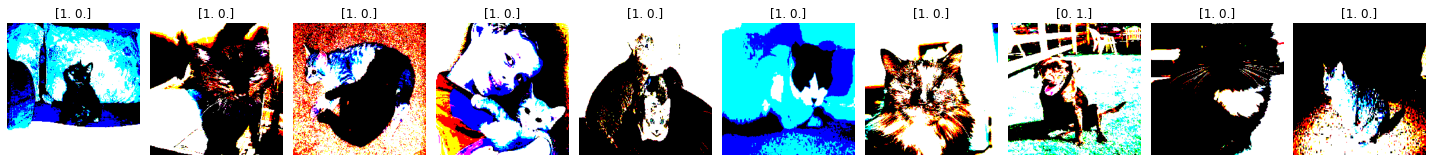

In [44]:
plot_image(img,label)

In [45]:
from tensorflow.keras.layers import MaxPool2D,Conv2D,Flatten

In [47]:
modelcnn = Sequential([
    Conv2D(filters = 32, kernel_size=(32,32),activation="relu",padding='same',input_shape=(224,224,3)),
    MaxPool2D((2,2),strides=2),
    Conv2D(64,(32,32),activation="relu",padding="same"),
    MaxPool2D((2,2),2),
    Flatten(),
    Dense(2,activation='softmax')
])

In [48]:
modelcnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      98336     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      2097216   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 401410    
Total params: 2,596,962
Trainable params: 2,596,962
Non-trainable params: 0
____________________________________________

In [51]:
modelcnn.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
modelcnn.fit(x=train_batches,validation_data=vaild_batches,epochs=5,verbose=2)

Epoch 1/5


KeyboardInterrupt: 

# VGG

In [54]:
vgg16model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 170s 0us/step


In [55]:
vgg16model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [62]:
model_vgg16 = Sequential()
for i in vgg16model.layers[:-1]:
    model_vgg16.add(i)

In [63]:
model_vgg16.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [64]:
for i in model_vgg16.layers:
    i.trainable = False

In [65]:
model_vgg16.add(Dense(2,activation='softmax'))

In [66]:
model_vgg16.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

#  same style but replace last layer as 2 output , now the trainable model got reduced. to only for last layer, we setup all layer training to false but only last layer is activated to true... We are just using archof vgg not params 

In [67]:
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
model_vgg16.fit(x=train_batches,validation_data=vaild_batches,epochs=5,verbose=1)

Epoch 1/5
 14/100 [===>..........................] - ETA: 5:17 - loss: 0.7085 - accuracy: 0.7000

KeyboardInterrupt: 

# Mobilenet

In [72]:
mob = tf.keras.applications.mobilenet_v2.MobileNetV2()

14548992/14536120 [==============================] - 7s 1us/step


In [73]:
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image

In [78]:
def prepare_image(file):
    #file = "./mobilenet_data/"+file
    img = image.load_img(file,target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_exp = np.expand_dims(img_array,axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_exp)

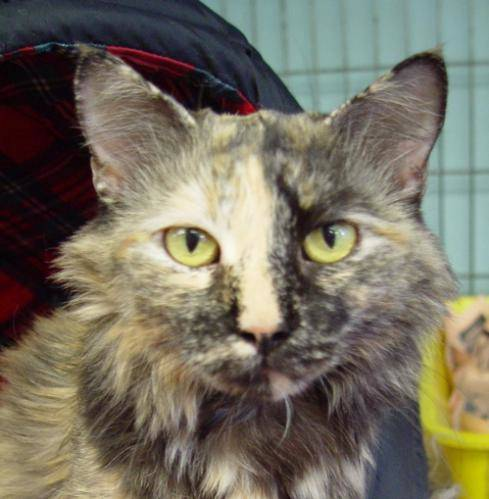

In [80]:
from IPython.display import Image
Image('./dog_vs_cat/cat.10.jpg')

# mobilenet_data prepocess the data and sclae tha rgb value to -1, 1

In [85]:
#processed_img = prepare_image('./dog_vs_cat/cat.10.jpg')
#pred = mob.predict(prepare_image)
#results = imagenet_utils.decode_predictions(pred)

# Custom Mobilenet

In [86]:
os.chdir('./sign/Dataset/')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [114]:
train_path_sign = './sign/Dataset/train/'
test_path_sign = './sign/Dataset/test/'
valid_path_sign = './sign/Dataset/valid/'



In [115]:
train_batches_sign = ImageDataGenerator(preprocessing_function=
                                  tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path_sign,
                                                                                                        target_size=(224,224),
                                                                                                        batch_size=10)
test_batches_sign = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
test_path_sign,target_size=(224,224),batch_size=10,shuffle=False)

valid_batches_sign = ImageDataGenerator(preprocessing_function=
                                  tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path_sign,
                                                                                                        target_size=(224,224),
                                                                                                        batch_size=10)

Found 1712 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [116]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [117]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [118]:
X = mobile.layers[-6].output
output = Dense(10,activation='softmax')(X)

In [119]:
from tensorflow.keras.models import Model
model_mob_tune = Model(inputs=mobile.input,outputs=output)

In [120]:
model_mob_tune.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [121]:
len(model_mob_tune.layers)

88

In [122]:
for layer in model_mob_tune.layers[:-23]:
    layer.trainable =False

In [123]:
model_mob_tune.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [124]:
model_mob_tune.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])


In [125]:
model_mob_tune.fit(x=train_batches_sign,validation_data=valid_batches_sign,epochs=10,verbose=2)

Epoch 1/10
172/172 - 98s - loss: 0.6350 - accuracy: 0.8061 - val_loss: 0.2626 - val_accuracy: 0.9267
Epoch 2/10
172/172 - 107s - loss: 0.1222 - accuracy: 0.9813 - val_loss: 0.1366 - val_accuracy: 0.9567
Epoch 3/10
172/172 - 113s - loss: 0.0608 - accuracy: 0.9912 - val_loss: 0.0904 - val_accuracy: 0.9733
Epoch 4/10
172/172 - 104s - loss: 0.0343 - accuracy: 0.9982 - val_loss: 0.0668 - val_accuracy: 0.9867
Epoch 5/10
172/172 - 118s - loss: 0.0265 - accuracy: 0.9965 - val_loss: 0.0857 - val_accuracy: 0.9733
Epoch 6/10
172/172 - 130s - loss: 0.0215 - accuracy: 0.9977 - val_loss: 0.0816 - val_accuracy: 0.9733
Epoch 7/10
172/172 - 104s - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 0.9800
Epoch 8/10
172/172 - 100s - loss: 0.0146 - accuracy: 0.9982 - val_loss: 0.0583 - val_accuracy: 0.9733
Epoch 9/10
172/172 - 102s - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0646 - val_accuracy: 0.9800
Epoch 10/10
172/172 - 99s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0438 - va

In [132]:
test_batches_sign.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [136]:
pred=[]
for i in model_mob_tune.predict(test_batches_sign):
    pred.append(np.argmax(i))

In [137]:
from sklearn.metrics import confusion_matrix

In [141]:
cm=confusion_matrix(test_batches_sign.classes,pred)

<AxesSubplot:>

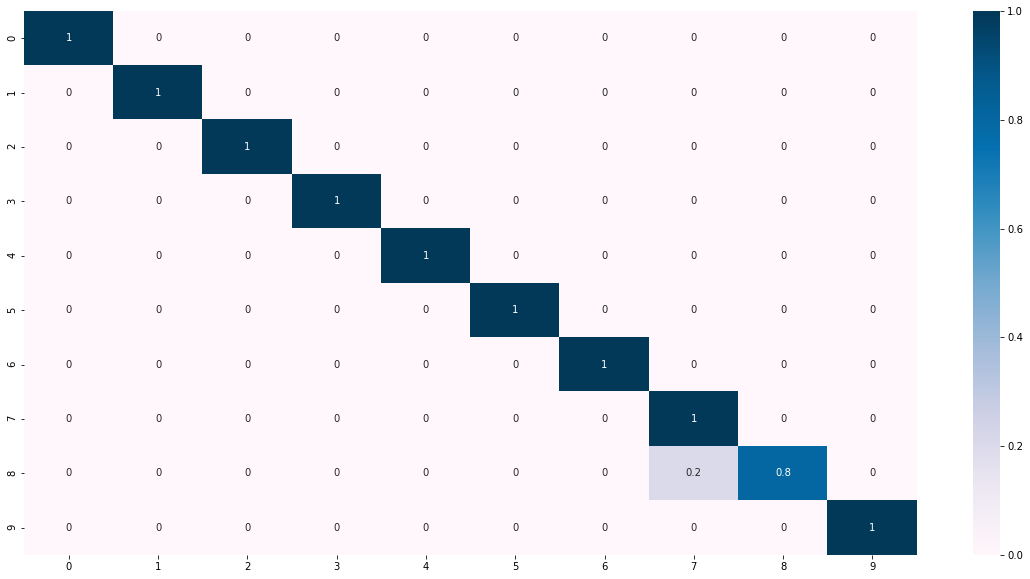

In [151]:
row_sums = cm.sum(axis=1, keepdims=True)
import seaborn as sns
sns.heatmap(cm/row_sums,cmap='PuBu',annot=True)

#  data arug

In [152]:
gen = ImageDataGenerator(height_shift_range=0.3,vertical_flip=True,horizontal_flip=True,rotation_range=0.3,zoom_range=0.5,width_shift_range=0.3)

In [176]:
img=np.expand_dims(plt.imread('./dog_vs_cat/cat.0.jpg'),axis=0)

In [182]:
aug_iter=gen.flow(img, save_to_dir='./dog_vs_cat', save_prefix='aug-image-', save_format='jpeg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


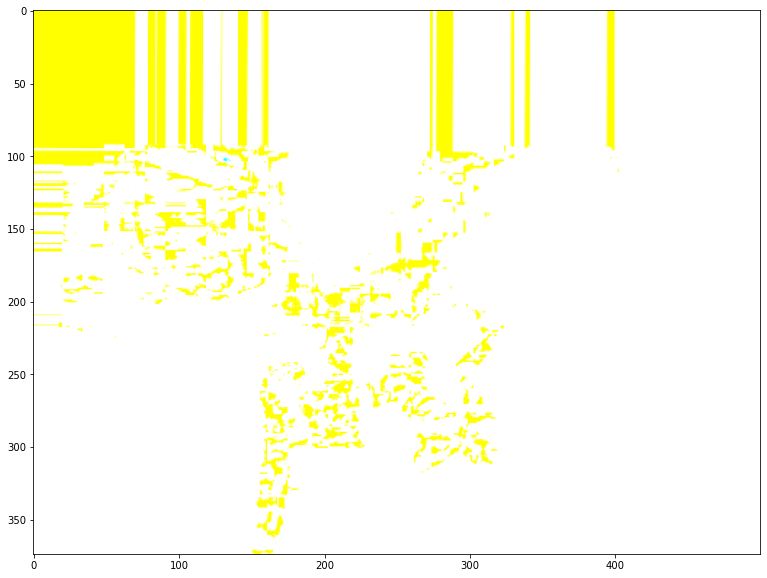

In [183]:
plt.imshow(aug_iter[0][0])

In [184]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

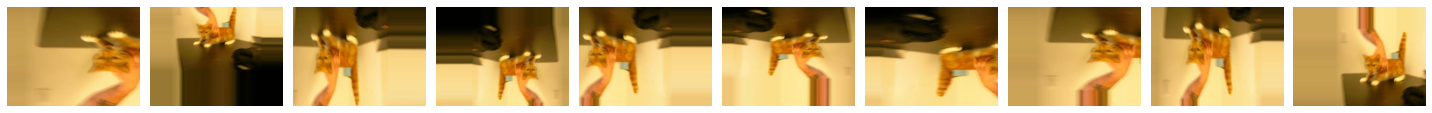

In [185]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(aug_images)